In [140]:
%matplotlib inline

In [141]:
import pandas as pd
import seaborn as sns
import numpy as np

In [142]:
T = 1000
t_0 = 800

t = np.arange(0, T)
y0 = np.sin(t/10.) + 15 + 0.1*np.random.normal(size=T)
y1 = y0 + (t > t_0) * ((t - t_0) / 100)

y = y0*(t<=t_0) + y1*(t>t_0)

df = pd.DataFrame({'t': t, 'Y': y})

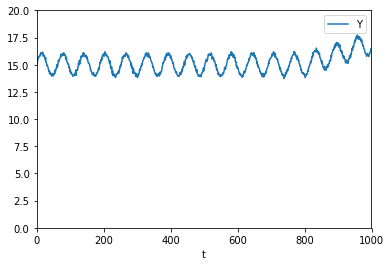

In [143]:
df.plot(x='t', y='Y', ylim=(0, 20))

In [144]:
from statsmodels.tsa.arima_model import ARMA

df_pre_treatment = df[df.t < t_0]
model = ARMA(df_pre_treatment['Y'], 
             (3,3), 
             exog=df_pre_treatment['t'])
result = model.fit()

df.loc[df.t > t_0, 'y0'] = result.predict(start=t_0, 
                                          end=t_0 + 199, 
                                          exog=np.arange(t_0, 
                                                         t_0 + 200))

/home/akelleh/.virtualenvs/data/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


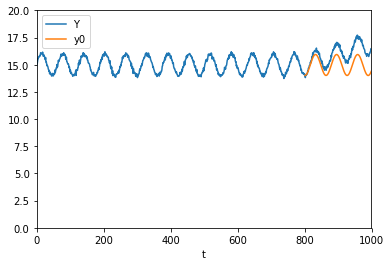

In [145]:
df.plot(x='t', y=['Y', 'y0'], ylim=(0, 20))

In [147]:
df.loc[df.t > t_0, 'y1'] = df.loc[df.t > t_0, 'Y']

In [148]:
df['delta'] = df['y1'] - df['y0']

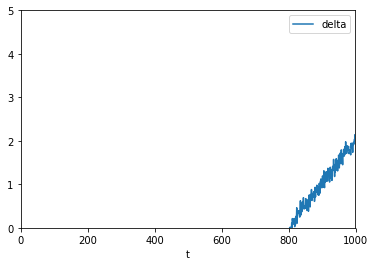

In [149]:
df.plot(x='t', y='delta', ylim=(0, 5))